# Part I - Ford GoBike System Data
## by Shahnaza Tursunova

## Introduction

## Introduce the dataset

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

During the analysis, following questions will be answered:

**Quesiton 1**: How member gender impacts trip duration?

**Question 2**: Is there any "rush hours"?

**Question 3**: Any relationship between gender/age/user types?

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Let's load the data set and check the samples.


In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.sample(10)

duration_sec                start_time                  end_time  \
160537          3142  2019-02-05 16:12:10.0080  2019-02-05 17:04:32.3450   
155715           460  2019-02-06 08:36:51.3620  2019-02-06 08:44:32.3310   
7380             268  2019-02-28 09:11:23.9540  2019-02-28 09:15:52.8690   
158573           557  2019-02-05 18:51:49.5040  2019-02-05 19:01:07.4820   
133322           364  2019-02-08 19:21:52.4040  2019-02-08 19:27:56.7150   
34042           1346  2019-02-24 09:23:40.9690  2019-02-24 09:46:06.9720   
171839           223  2019-02-03 18:40:07.9430  2019-02-03 18:43:51.2630   
139199           320  2019-02-07 22:05:40.1910  2019-02-07 22:11:01.0290   
80758           1433  2019-02-18 14:38:58.9690  2019-02-18 15:02:52.8670   
61109            546  2019-02-20 17:57:12.7630  2019-02-20 18:06:18.9560   

        start_station_id                                 start_station_name  \
160537             201.0                               10th St at Fallon St   
155715              58.0                               Market St at 10th St   
7380                 6.0                      The Embarcadero at Sansome St   
158573              15.0  San Francisco Ferry Building (Harry Bridges Pl...   
133322              89.0                         Division St at Potrero Ave   
34042              359.0                          Williams Ave at Apollo St   
171839              44.0  Civic Center/UN Plaza BART Station (Market St ...   
139199             148.0                               Horton St at 40th St   
80758                NaN                                                NaN   
61109               21.0   Montgomery St BART Station (Market St at 2nd St)   

        start_station_latitude  start_station_longitude  end_station_id  \
160537               37.797673              -122.262997           239.0   
155715               37.776619              -122.417385           350.0   
7380                 37.804770              -122.403234            11.0   
158573               37.795392              -122.394203            50.0   
133322               37.769218              -122.407646            30.0   
34042                37.730168              -122.398963            42.0   
171839               37.781074              -122.411738            60.0   
139199               37.829705              -122.287610           151.0   
80758                37.400000              -121.920000             NaN   
61109                37.789625              -122.400811            66.0   

                                      end_station_name  end_station_latitude  \
160537                   Bancroft Way at Telegraph Ave             37.868813   
155715                            8th St at Brannan St             37.771431   
7380                            Davis St at Jackson St             37.797280   
158573                           2nd St at Townsend St             37.780526   
133322  San Francisco Caltrain (Townsend St at 4th St)             37.776598   
34042    San Francisco City Hall (Polk St at Grove St)             37.778650   
171839                            8th St at Ringold St             37.774520   
139199                            53rd St at Hollis St             37.836182   
80758                                              NaN             37.400000   
61109                            3rd St at Townsend St             37.778742   

        end_station_longitude  bike_id   user_type  member_birth_year  \
160537            -122.258764     4496  Subscriber             1995.0   
155715            -122.405787     5063  Subscriber             1975.0   
7380              -122.398436     6523  Subscriber             1978.0   
158573            -122.390288     5577  Subscriber             1959.0   
133322            -122.395282     1513  Subscriber             1989.0   
34042             -122.418230     6523  Subscriber             1988.0   
171839            -122.409449     5237  Subscriber             1993.0   
139199    

Before going to analysis, let's clean out our data - check for Null/NaN values, correct columnt types, delete columns/rows if necessary. For each operation, description, and the purpose of the operation will be given. 

In [3]:
df.shape

(183412, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

- start_time and end_time columns type is defined as object. Let's change it to datetime.

In [5]:
df['start_time'] = df['start_time'].astype('datetime64[ns]')
df['end_time'] = df['end_time'].astype('datetime64[ns]')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

We don't need station_id, station_latitude and station_longitude columns, since we are not going to investigate geographic location of the start and end points. So, drop them.

In [6]:
drop_column_names = ['start_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_latitude', 'end_station_longitude']
df.drop(drop_column_names, axis='columns', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_name       183215 non-null  object        
 4   end_station_name         183215 non-null  object        
 5   bike_id                  183412 non-null  int64         
 6   user_type                183412 non-null  object        
 7   member_birth_year        175147 non-null  float64       
 8   member_gender            175147 non-null  object        
 9   bike_share_for_all_trip  183412 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(2), object(5)
memory usage: 14.0+ MB


Now, duration_sec and bike_id columns are better to be int32 type.

In [7]:
df['duration_sec'] = df['duration_sec'].astype('int32')
df['bike_id'] = df['bike_id'].astype('int32')
df.describe()

duration_sec                     start_time  \
count  183412.000000                         183412   
mean      726.078435  2019-02-15 21:07:59.090985728   
min        61.000000     2019-02-01 00:00:20.636000   
25%       325.000000  2019-02-08 08:31:50.814249984   
50%       514.000000  2019-02-15 23:05:02.337500160   
75%       796.000000  2019-02-22 11:01:16.969750016   
max     85444.000000     2019-02-28 23:59:18.548000   
std      1794.389780                            NaN   

                            end_time        bike_id  member_birth_year  
count                         183412  183412.000000      175147.000000  
mean   2019-02-15 21:20:05.668533504    4472.906375        1984.806437  
min       2019-02-01 00:04:52.058000      11.000000        1878.000000  
25%    2019-02-08 08:42:17.385500160    3777.000000        1980.000000  
50%       2019-02-15 23:17:22.168000    4958.000000        1987.000000  
75%    2019-02-22 11:14:24.885750016    5502.000000        1992.000000  
max       2019-03-01 08:01:55.975000    6645.000000        2001.000000  
std                              NaN    1664.383394          10.116689

Before going on the member_birth_year column - let's check whether the table has NaN values. 

In [8]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_name          197
end_station_name            197
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

If we observe NaN values, we can see that, memeber_birth_year and member_gender have equal amount of number NaN values (which is 8265). Most probably, they are on the same raw:

In [9]:
len(df[(df['member_gender'].isnull()) & (df['member_birth_year'].isnull())])

8265

And, I assume, member_gender and member_birth_year are NaN, when customer is not a subscribed member:


In [10]:
len(df[(df['member_gender'].isnull()) & (df['member_birth_year'].isnull()) & (df['user_type']=='Customer')])

3237

In [11]:
len(df[(df['member_gender'].isnull()) & (df['member_birth_year'].isnull()) & (df['user_type']=='Subscriber')])

5028

Well, my assumption was incorrect - even some of the subscibers have not defined their gender and birth year. And, let's calculate the persentage of not defined member_gender and member_birth_year:

In [12]:
(len(df[(df['member_gender'].isnull()) & (df['member_birth_year'].isnull())])/df.shape[0])*100

4.506248228033062

It's just 4.5% of overall data. If we drop it, the result won't change significantly. Let's drop rows with NaN values in member_gender and member_birth_year columns. 

In [13]:
df.dropna(subset=['member_gender', 'member_birth_year'], inplace=True)
df.isnull().sum()

duration_sec                 0
start_time                   0
end_time                     0
start_station_name         195
end_station_name           195
bike_id                      0
user_type                    0
member_birth_year            0
member_gender                0
bike_share_for_all_trip      0
dtype: int64

Similarly, we will check null values on start_station_name and end_station_name columns, and find out that they are in the same rows. Number of rows is too small comparing to the total number of data, therefore, we can drop them too. 

In [14]:
len(df[(df['start_station_name'].isnull()) & (df['end_station_name'].isnull())])

195

In [15]:
df.dropna(subset=['start_station_name', 'end_station_name'], inplace=True)
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_name         0
end_station_name           0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174952 entries, 0 to 183411
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int32         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_name       174952 non-null  object        
 4   end_station_name         174952 non-null  object        
 5   bike_id                  174952 non-null  int32         
 6   user_type                174952 non-null  object        
 7   member_birth_year        174952 non-null  float64       
 8   member_gender            174952 non-null  object        
 9   bike_share_for_all_trip  174952 non-null  object        
dtypes: datetime64[ns](2), float64(1), int32(2), object(5)
memory usage: 13.3+ MB


Now, it is time to change member_birth_year column type to int16. In addition, it is better to work and easy to understand customer _age_ instead of their birth year; therefore, we will add new column - member_age (int8). For the member_age column, we need to come back to the when the ride was performed - the data was given for 2019 year (it can be either confirmed by checking year part of start_time and end_time columns)

In [17]:
df['member_birth_year'] = df['member_birth_year'].astype('int16')

# check year of start end end time
print(df['start_time'].dt.year.unique())
print(df['end_time'].dt.year.unique())

[2019]
[2019]


In [18]:
df.describe()

duration_sec                     start_time  \
count  174952.000000                         174952   
mean      704.002744  2019-02-15 21:27:05.282492160   
min        61.000000     2019-02-01 00:00:20.636000   
25%       323.000000  2019-02-08 08:32:16.954249984   
50%       510.000000  2019-02-15 22:20:21.685499904   
75%       789.000000  2019-02-22 11:22:05.289500160   
max     84548.000000     2019-02-28 23:59:18.548000   
std      1642.204905                            NaN   

                            end_time        bike_id  member_birth_year  
count                         174952  174952.000000      174952.000000  
mean   2019-02-15 21:38:49.784215040    4482.587555        1984.803135  
min       2019-02-01 00:04:52.058000      11.000000        1878.000000  
25%    2019-02-08 08:42:33.415500032    3799.000000        1980.000000  
50%    2019-02-15 22:33:41.234500096    4960.000000        1987.000000  
75%    2019-02-22 11:37:06.322249984    5505.000000        1992.000000  
max       2019-03-01 08:01:55.975000    6645.000000        2001.000000  
std                              NaN    1659.195937          10.118731

If we look at the minimum value of the member_birth_year, we can see 1878. Most probably, there was a typo, but first check how many of them and then delete outliners.

In [19]:
# let's assume, maximum age to ride a bike is 75 year
# so, check is there older than 1944
len(df[df['member_birth_year']<1944])

263

In [20]:
# remove older than 1944:
df.drop(df[df['member_birth_year'] < 1944].index, inplace=True)
df

duration_sec              start_time                end_time  \
0              52185 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   
2              61854 2019-02-28 12:13:13.218 2019-03-01 05:24:08.146   
3              36490 2019-02-28 17:54:26.010 2019-03-01 04:02:36.842   
4               1585 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074   
5               1793 2019-02-28 23:49:58.632 2019-03-01 00:19:51.760   
...              ...                     ...                     ...   
183407           480 2019-02-01 00:04:49.724 2019-02-01 00:12:50.034   
183408           313 2019-02-01 00:05:34.744 2019-02-01 00:10:48.502   
183409           141 2019-02-01 00:06:05.549 2019-02-01 00:08:27.220   
183410           139 2019-02-01 00:05:34.360 2019-02-01 00:07:54.287   
183411           271 2019-02-01 00:00:20.636 2019-02-01 00:04:52.058   

                                      start_station_name  \
0       Montgomery St BART Station (Market St at 2nd St)   
2                                Market St at Dolores St   
3                                Grove St at Masonic Ave   
4                                    Frank H Ogawa Plaza   
5                           4th St at Mission Bay Blvd S   
...                                                  ...   
183407                           Beale St at Harrison St   
183408  Montgomery St BART Station (Market St at 2nd St)   
183409                            The Alameda at Bush St   
183410                       San Pablo Ave at MLK Jr Way   
183411                             Spear St at Folsom St   

                                    end_station_name  bike_id   user_type  \
0                     Commercial St at Montgomery St     4902    Customer   
2       Powell St BART Station (Market St at 4th St)     5905    Customer   
3                             Central Ave at Fell St     6638  Subscriber   
4                              10th Ave at E 15th St     4898  Subscriber   
5                                 Broadway at Kearny     5200  Subscriber   
...                                              ...      ...         ...   
183407           Union Square (Powell St at Post St)     4832  Subscriber   
183408                         3rd St at Townsend St     4960  Subscriber   
183409                     Morrison Ave at Julian St     3824  Subscriber   
183410                      San Pablo Ave at 27th St     5095  Subscriber   
183411                           2nd St at Folsom St     1057  Subscriber   

        member_birth_year member_gender bike_share_for_all_trip  
0                    1984          Male                      No  
2                    1972          Male                      No  
3                    1989         Other                      No  
4                    1974          Male                     Yes  
5                    1959          Male                      No  
...                   ...           ...                     ...  
183407               1996          Male                      No  
183408               1984          Male                      No  
183409               1990          Male                     Yes  
183410               1988          Male                      No  
183411               1989          Male                      No  

[174689 rows x 10 columns]

In [21]:
# add the column member_age
df['member_age'] = (2019-df['member_birth_year']).astype('int8')
df

duration_sec              start_time                end_time  \
0              52185 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   
2              61854 2019-02-28 12:13:13.218 2019-03-01 05:24:08.146   
3              36490 2019-02-28 17:54:26.010 2019-03-01 04:02:36.842   
4               1585 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074   
5               1793 2019-02-28 23:49:58.632 2019-03-01 00:19:51.760   
...              ...                     ...                     ...   
183407           480 2019-02-01 00:04:49.724 2019-02-01 00:12:50.034   
183408           313 2019-02-01 00:05:34.744 2019-02-01 00:10:48.502   
183409           141 2019-02-01 00:06:05.549 2019-02-01 00:08:27.220   
183410           139 2019-02-01 00:05:34.360 2019-02-01 00:07:54.287   
183411           271 2019-02-01 00:00:20.636 2019-02-01 00:04:52.058   

                                      start_station_name  \
0       Montgomery St BART Station (Market St at 2nd St)   
2                                Market St at Dolores St   
3                                Grove St at Masonic Ave   
4                                    Frank H Ogawa Plaza   
5                           4th St at Mission Bay Blvd S   
...                                                  ...   
183407                           Beale St at Harrison St   
183408  Montgomery St BART Station (Market St at 2nd St)   
183409                            The Alameda at Bush St   
183410                       San Pablo Ave at MLK Jr Way   
183411                             Spear St at Folsom St   

                                    end_station_name  bike_id   user_type  \
0                     Commercial St at Montgomery St     4902    Customer   
2       Powell St BART Station (Market St at 4th St)     5905    Customer   
3                             Central Ave at Fell St     6638  Subscriber   
4                              10th Ave at E 15th St     4898  Subscriber   
5                                 Broadway at Kearny     5200  Subscriber   
...                                              ...      ...         ...   
183407           Union Square (Powell St at Post St)     4832  Subscriber   
183408                         3rd St at Townsend St     4960  Subscriber   
183409                     Morrison Ave at Julian St     3824  Subscriber   
183410                      San Pablo Ave at 27th St     5095  Subscriber   
183411                           2nd St at Folsom St     1057  Subscriber   

        member_birth_year member_gender bike_share_for_all_trip  member_age  
0                    1984          Male                      No          35  
2                    1972          Male                      No          47  
3                    1989         Other                      No          30  
4                    1974          Male                     Yes          45  
5                    1959          Male                      No          60  
...                   ...           ...                     ...         ...  
183407               1996          Male                      No          23  
183408               1984          Male                      No          35  
183409               1990          Male                     Yes          29  
183410               1988          Male                      No          31  
183411               1989          Male                      No          30  

[174689 rows x 11 columns]

In [22]:
print(df['member_gender'].unique())
print(df['bike_share_for_all_trip'].unique())

['Male' 'Other' 'Female']
['No' 'Yes']


It is also better to make category variable for member_gender, user_type and bike_share_for_all_trip columns. 

In [23]:
# change type of member_gender column to be category
gender_classes = ['Male', 'Female', 'Other']
gender_category = pd.CategoricalDtype(ordered=True, categories=gender_classes)
df['member_gender'] = df['member_gender'].astype(gender_category)

# change type of the user_type column 
df['user_type'] = df['user_type'].astype('category')

# change bike_share_for_all_trip column to be category
df['bike_share_for_all_trip'] = df['bike_share_for_all_trip'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174689 entries, 0 to 183411
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174689 non-null  int32         
 1   start_time               174689 non-null  datetime64[ns]
 2   end_time                 174689 non-null  datetime64[ns]
 3   start_station_name       174689 non-null  object        
 4   end_station_name         174689 non-null  object        
 5   bike_id                  174689 non-null  int32         
 6   user_type                174689 non-null  category      
 7   member_birth_year        174689 non-null  int16         
 8   member_gender            174689 non-null  category      
 9   bike_share_for_all_trip  174689 non-null  category      
 10  member_age               174689 non-null  int8          
dtypes: category(3), datetime64[ns](2), int16(1), int32(2), int8(1), object(2)
memory us

### What is the structure of your dataset?

After cleaning, our dataset contains 174952 entries and 10 columns:
* duration_sec: duration of the trip in seconds
* start_time: start time of the trip
* end_time: end time of the trip
* bike_id: numeric identifier of the bike
* user_type: type of the user - Subscriber or Customer
* member_birth_year: birth year of the member
* member_gender: gender of the member (Male, Female or Other)
* bike_share_for_all_trip: defines whether bike is shared for all trip
* member_age: age of the member at the time of ride.

### What is/are the main feature(s) of interest in your dataset?
* Duration of the trip and any correlation between other values.
* Most popular stations.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
To investigate my main interest in the dataset, duration_sec, user_type, member_gender and member_age information will help me. 

In [24]:
# since we cleaned up our dataset, let's save the intermediate dataset. 
df.to_csv('201902-fordgobike-tripdata_cleaned.csv', index=False)

## Univariate Exploration

In this section, distributions of individual variables will be investigated. 

1. Check age distribution

(15.0, 90.0)

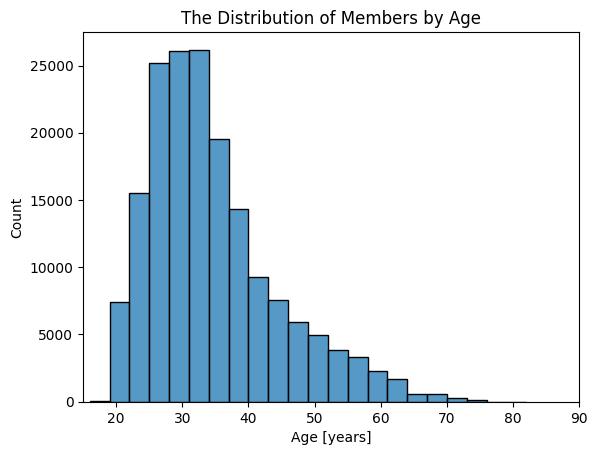

In [26]:
# plot the dustribution of members by age
bins=np.arange(16,85,3)
sns.histplot(data = df, x = 'member_age', bins=bins)

# Format the plot's visual
plt.xlabel('Age [years]')
plt.title('The Distribution of Members by Age');
plt.xlim(15, 90)

_Finding 1:_ Members with age 20~45 are the main users of the bikes. 

2. Distribution of trip duration. For the trip duration to be displayed using histogramm, it is better to put bins paramter for better visualization 

Text(0.5, 1.0, 'Distribution of Trip Duration')

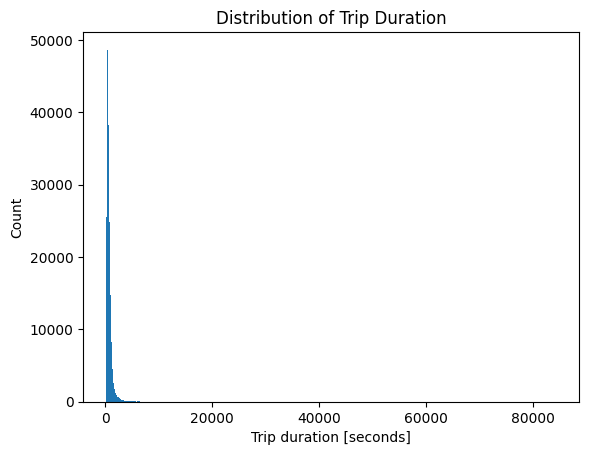

In [38]:
bins=np.arange(50,84500,200)
plt.hist(data = df, x = 'duration_sec', bins=bins)
plt.xlabel('Trip duration [seconds]')
plt.ylabel('Count')
plt.title('Distribution of Trip Duration')

Even with the bins it is hard to see the distribution. For the more clear it is better to apply logarithmic scale on X-axis.

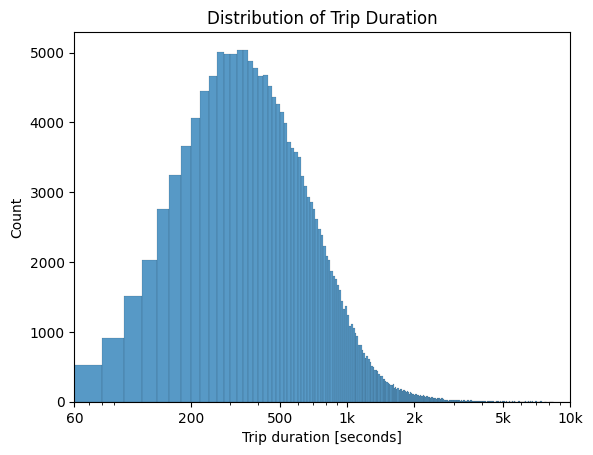

In [39]:
# plotting trip duration distribution in log scale

bins = np.arange(60, 10000, 20)
sns.histplot(data=df, x='duration_sec', bins=bins)
plt.xscale('log')
plt.xlim(60, 10000)
x_tick_value = [60, 200, 500, 1000, 2000, 5000, 10000]
x_tick_labels = ['60', '200', '500', '1k', '2k', '5k', '10k']
plt.xticks(x_tick_value, x_tick_labels)
plt.xlabel('Trip duration [seconds]')
plt.ylabel('Count')
plt.title('Distribution of Trip Duration');

_Finding 2:_ Now, we can see clear unimodal (that has only one peak) distribution with the peak at 300 seconds (the most frequent trip duration). And it has a long right tail. 

Before going to the next distributions, I'm going to introdue plot_distribution function in order to not use the same code several times:

In [40]:
def plot_distribution(data, x_data, xlabel, ylabel, title):
    sns.countplot(data=data, x=x_data)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

3. Distribution of user type - customer vs subscriber

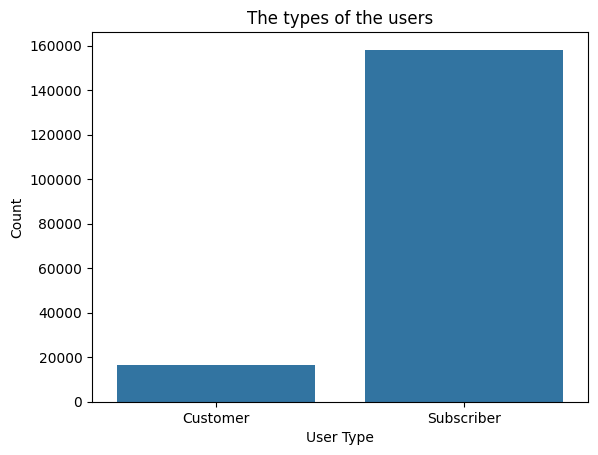

In [41]:
plot_distribution(df, 'user_type', 'User Type', 'Count', 'The types of the users')

_Finding 3_: Obviously, Subcribers are the majority of the users - 90% of users are Subscribers, and only 10% are regular customers.

4. Gender distribution

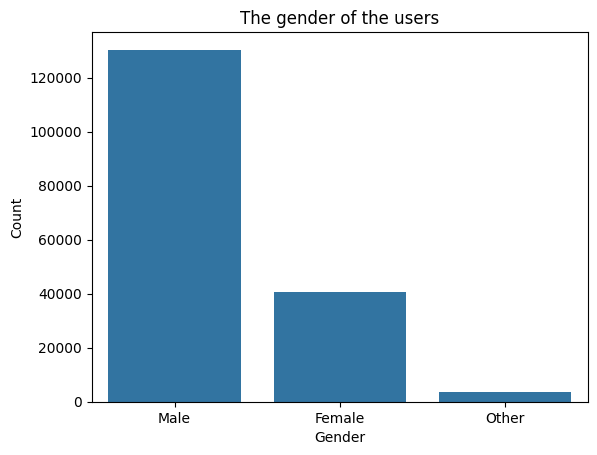

In [42]:
plot_distribution(df, 'member_gender', 'Gender', 'Count', 'The gender of the users')

_Finding 4:_ Around 75% of all users are male, and 24% are female. 

5. Bike sharing distribution

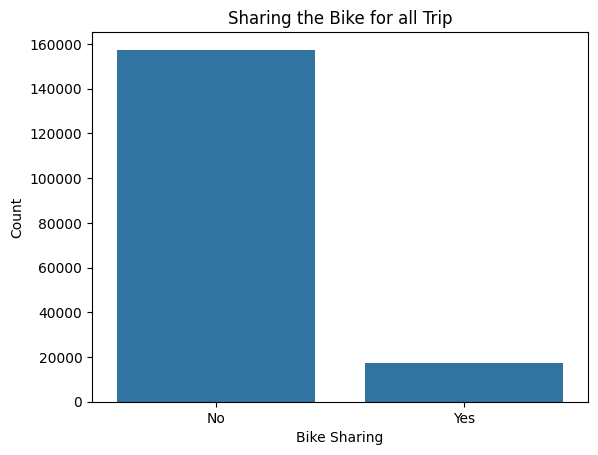

In [43]:
plot_distribution(df, 'bike_share_for_all_trip', 'Bike Sharing', 'Count', 'Sharing the Bike for all Trip')

_Finding 5:_ More than 90% of users do not share the bike for all trip. 

6. Distribution of Start Hour

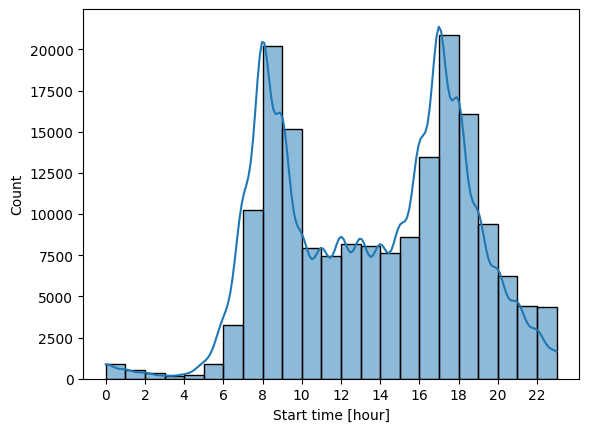

In [44]:
df['start_hour'] = df['start_time'].dt.hour

sns.histplot(data=df, x='start_hour', binwidth=1, kde=True);
plt.xlabel('Start time [hour]')
plt.ylabel('Count')
plt.xticks([t for t in range(24) if t%2==0]);

_Finding 6:_ In the trip duration distribution, we have seen unimodal distribution. Now, in the start time distribution we can clearly see bimodal distribution with two peaks. The first peak hour is 8 a.m, and the second one is 5 p.m. It can be easily explained with the beginning and the end of the work hours. 

7. Top 10 most popular stations. 

In [45]:
# Since we have to make it for start and end stations, let's do it within the function
# which plots 10 most popular values of given column

def plot_10_most_popular_stations(_df, col, title):
    # first we will get 10 most popular  stations based on it's value counts.
    station_count = _df[col].value_counts().reset_index(name='trips_count')[:10]

    # extract sub data-frame of those 10 most popular stations from main data-frame
    sub_data_frame=_df.loc[_df[col].isin(station_count[col])]

    # get the correct order
    station_order=station_count[col]

    # now, it is ready to plot
    sns.countplot(data=sub_data_frame, y=col, order=station_order)
    plt.xlabel('Count')
    plt.ylabel('')
    plt.title(title)

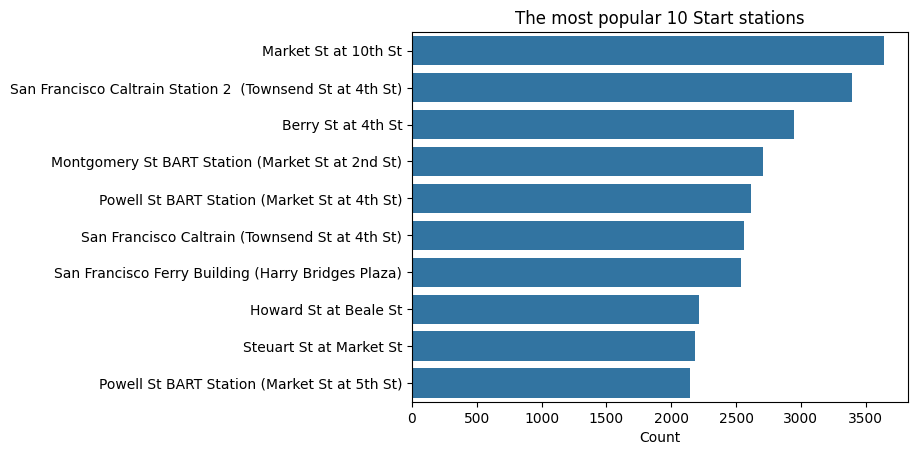

In [46]:
plot_10_most_popular_stations(df, 'start_station_name', 'The most popular 10 Start stations')

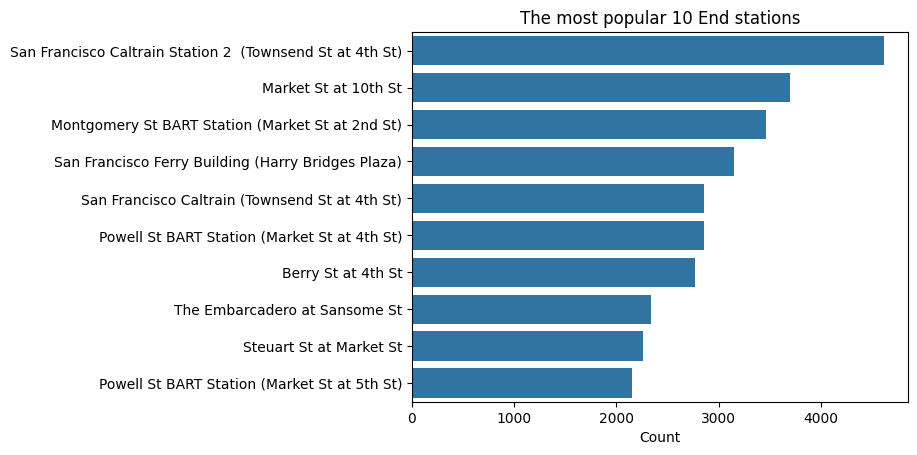

In [47]:
plot_10_most_popular_stations(df, 'end_station_name', 'The most popular 10 End stations')

_Finding 7:_ From the above plot, we found 10 most popular start and end stations. It is noticeble that some of the stations are popular in both cases - 'San Francisco Caltrain Station 2', Market St at 10th St', 'Montgomery St BART Station', 'San Francisco Caltrain', 'San Francisco Ferry Building', and 'Powell St BART Station'. 

# Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

In the 'Trip Duration' observation, the curve of the duration is right skewed, so logarithmic scale transformation has been used and an x-axis limit has been added to focus on the most frequent interval. The curve appeared unimodal with a peak around 300 seconds.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Start time distribution is a bimodal distribution with two peaks around 8 a.m. and 5 p.m.
Most users are 20-45 years old.
Most users are subscribers, males and didn't share the bike for all trip.
No significant changes have been made on the data, except deleting incorrect/outlined data, correcting data types, and extracting plottable data (such as start hour from start date). 

## Bivariate Exploration

In this section, I will investigate relationships between pairs of variables in the given data. 


### Duration and other variables

1. Is the duration of the trip depends on the type of the user (customer vs subscriber)?

<Figure size 600x600 with 0 Axes>

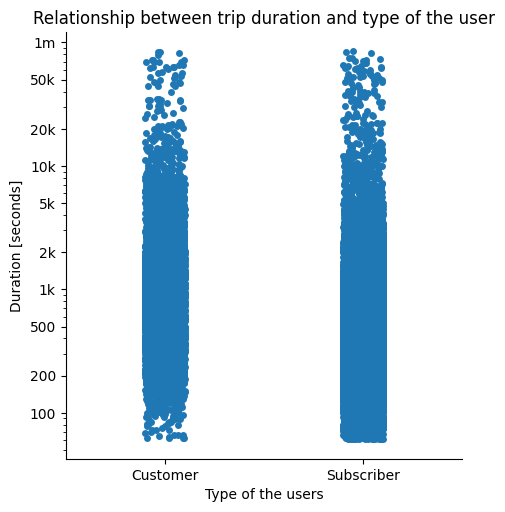

In [50]:
# predefine the size of the figure
plt.figure(figsize=[6,6])

# boxplot - since we have only two types of users
sns.catplot(data=df, x='user_type', y='duration_sec')
plt.yscale('log')
y_ticklocs=[100, 200, 500, 1e3, 2e3, 5e3, 1e4, 2e4, 5e4, 1e5]
y_ticklabels=['100', '200', '500', '1k', '2k', '5k', '10k', '20k', '50k', '1m']
plt.yticks(y_ticklocs,y_ticklabels)
plt.xlabel('Type of the users')
plt.ylabel('Duration [seconds]')
plt.title('Relationship between trip duration and type of the user');

_Finding 1:_ On average, regular subscriber has shorter trip duration comparing to the not subscribed customer. 

2. How duration of the trip is correlated with the start time of the trip?

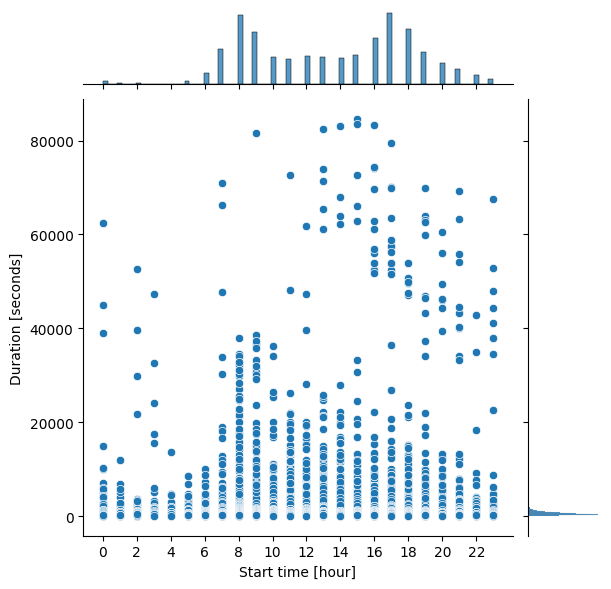

In [69]:
sns.jointplot(data=df, x='start_hour', y='duration_sec')
plt.xlabel('Start time [hour]')
plt.xticks([t for t in range(24) if t%2==0])
plt.ylabel('Duration [seconds]');

_Finding 2:_ Of course, most of the long duration trips were made during the day - between 12~17 hours. During the night and early morning (01:00~05:00) minimum number of trips with small duration. 

Let's go a little bit deeper, and check the correlation of start time and trip duration in terms of number of trips:

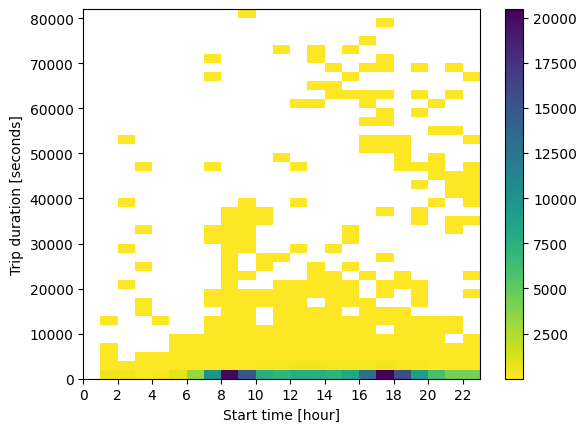

In [70]:
# Use cmin to set a minimum bound of counts a
# Use cmap to reverse the color map. 
bins_x = np.arange(1, 24, 1)
bins_y = np.arange(0, 84000, 2000)
plt.hist2d(data=df, x = 'start_hour', y='duration_sec', cmin=0.2, cmap='viridis_r',bins=[bins_x, bins_y])
plt.colorbar()
plt.xticks([t for t in range(24) if t%2==0])
plt.xlabel('Start time [hour]')
plt.ylabel('Trip duration [seconds]');

_Finding 2 - addition:_ Highest number of trips that have been made around 8a.m. and 5p.m. are short trips. 

3. Now, let's check age and gender of the users. 

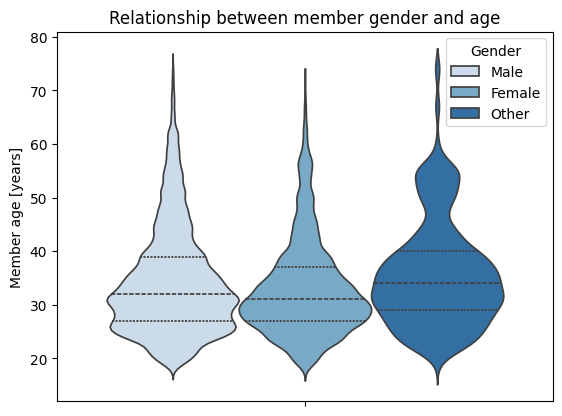

In [71]:
sns.violinplot(data=df, y='member_age', hue='member_gender', palette="Blues", inner='quartile')
plt.ylabel('Member age [years]');
plt.legend(title='Gender')
plt.title('Relationship between member gender and age');

_Finding 3:_ Male and female user's average age is between 28 and 39, which is slightly younger than the Other gender type users (30~40 years)

4. How about user type vs gender?

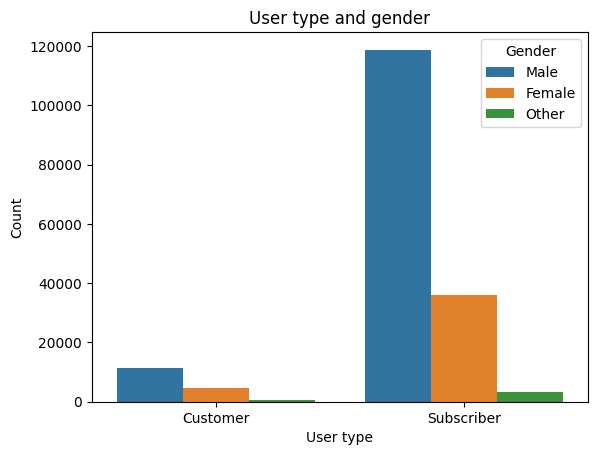

In [72]:
sns.countplot(data=df, x='user_type', hue='member_gender')
plt.xlabel('User type')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.title('User type and gender');

In above plot, we can see the general trand - in both customer and subscriber have more male users. But, let's check the ratio of it:

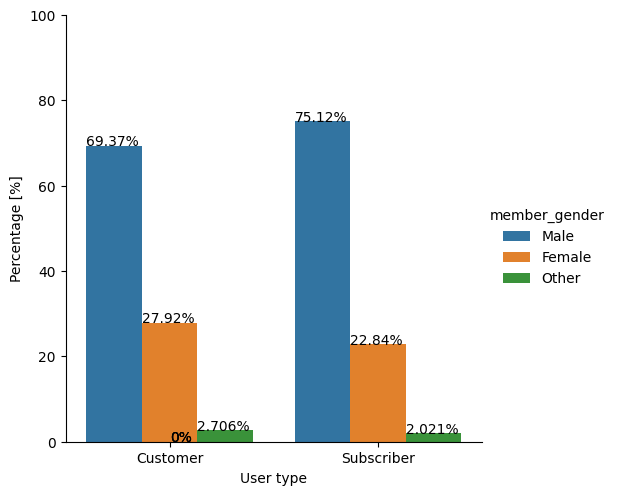

In [73]:
# extract the plot data
x,y = 'user_type', 'member_gender'
plot_data = df.groupby(x, observed=True)[y].value_counts(normalize=True);
plot_data = plot_data.mul(100)
plot_data = plot_data.rename('percent').reset_index()

# plot the data
g = sns.catplot(data=plot_data, x=x, y='percent', hue=y, kind='bar')
g.ax.set_ylim(0,100);
g.set_axis_labels('User type', 'Percentage [%]')

# put percentage on top of barplots
for p in g.ax.patches:
    txt = str(p.get_height())[0:5] + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

_Finding 4:_ From the previous findings we know, that 90% of total users are subscribers. And from these subscribers 75% are male, almost 23% are female, and 2% are other type of gender. From remaining 10% of total users, almost 70% are male, 28% female and 2.7% are other type of gender. 

5. Is there any relationship between the age of the user and duration of the trip? 

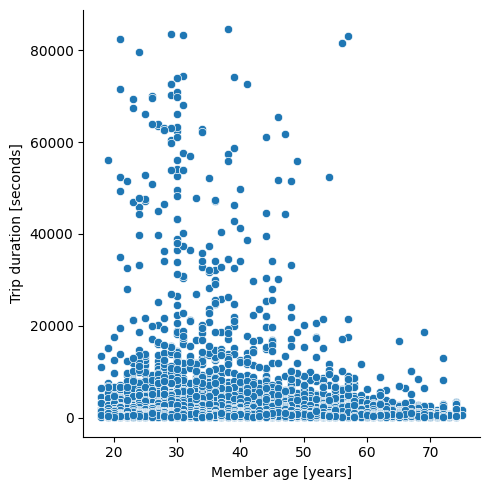

In [90]:
sns.relplot(data=df, x='member_age', y='duration_sec')
plt.xlabel('Member age [years]')
plt.ylabel('Trip duration [seconds]');

_Finding 5:_ There is a weak negative relationship between the trip duration and the member age: the older the user, the shorter the duration of the trip.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

On average, regular subscriber has shorter trip duration comparing to the customer.

Most of the longest duration was made during the day - between 12\~17 hours.

Highest number of trips that have been made around 8a.m. and 5p.m. are short trips.

Male and female user's average age is between 28 and 39, which is slightly younger than the Other gender type users (30\~40 years)

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
There is a weak negative relationship between the trip duration and the member age: the older the user, the shorter the duration of the trip.

From the previous findings we know, that 90% of total users are subscribers. And from these subscribers 75% are male, almost 23% are female, and 2% are other type of gender. From remaining 10% of total users, almost 70% are male, 28% female and 2.7% are other type of gender.

## Multivariate Exploration


1. Let's check in deep the relationship between member age and gender with trip start time.

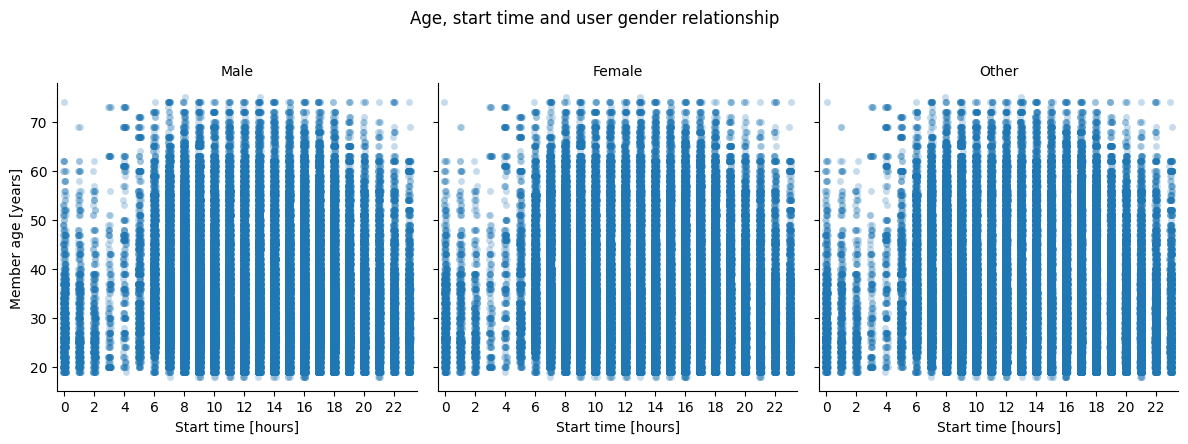

In [126]:
hours = [t for t in range(24)]

grid=sns.FacetGrid(data=df, col='member_gender', height=4, aspect=1)
grid.map(sns.stripplot, data=df, x='start_hour', y='member_age', dodge=True, alpha=.25, order=hours);
grid.set_titles('{col_name}')
grid.set_axis_labels('Start time [hours]','Member age [years]')
grid.set(xticks=[t for t in range(24) if t%2==0])
plt.suptitle('Age, start time and user gender relationship', x=0.5, y=1.1);

_Finding 1:_ During the night and early morning hours, bikes are used mostly by younger user (<35\~40) not depending on user gender. Older generation mostly uses during the day time.

2. Let's check for the relationship between the member age, gender and bike sharing.

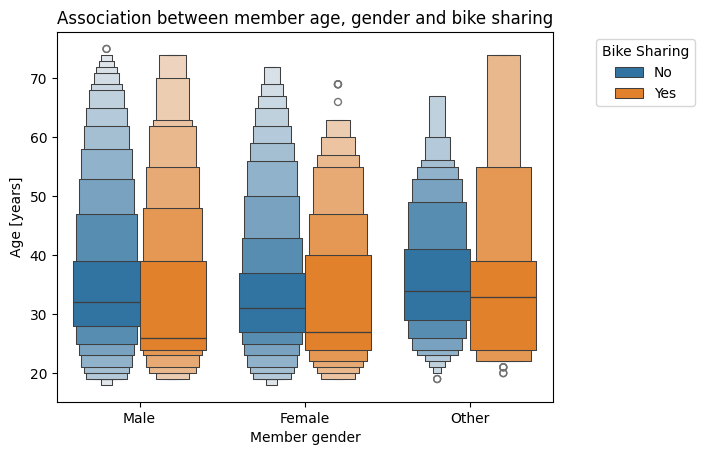

In [127]:
sns.boxenplot(data = df, x='member_gender', y='member_age', hue='bike_share_for_all_trip', width_method='linear')

# Format the plot's visual
plt.xlabel('Member gender')
plt.ylabel('Age [years]')
plt.title('Association between member age, gender and bike sharing')
plt.legend(title='Bike Sharing', bbox_to_anchor=(1.3, 1));

_Finding 2:_ "The younger the user - share the bike" in all gender types. 

3. When customer/subscribers use mostly?

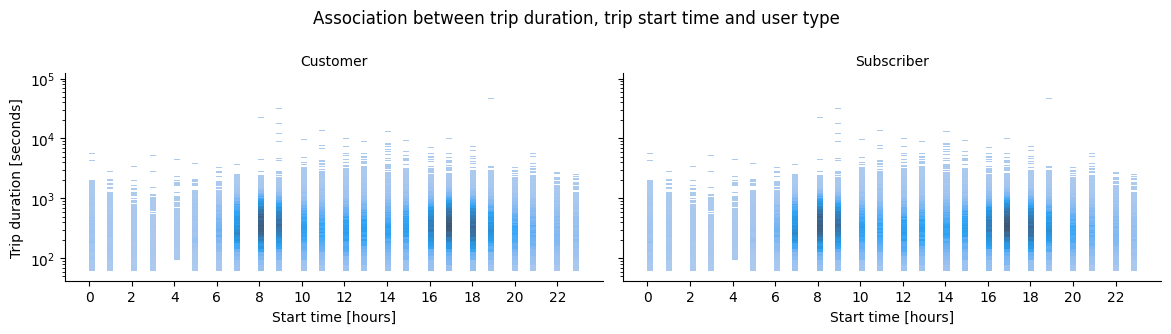

In [128]:
# make facetgrid, and associate it with histplot
grid = sns.FacetGrid(data=df, col='user_type', height=3, aspect=2)
grid.map(sns.histplot, data=df, x='start_hour', y='duration_sec')


# set titles, labels, ticks and scales
grid.set_titles('{col_name}', size = 10)
grid.set_axis_labels('Start time [hours]','Trip duration [seconds]', size = 10)
grid.set(xticks=[t for t in range(24) if t%2==0], yscale='log')
plt.suptitle('Association between trip duration, trip start time and user type', x=0.5, y=1.1);

_Finding 3:_ Both subscribers and customers use bikes mostly during the day time, especially during the 'rush hours' - around 8:00 and 17:00. Even the longest trips were done on rush hours by both - regular subscribers and customers. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Both subscribers and customers use bikes mostly during the day time.

### Were there any interesting or surprising interactions between features?

The younger the user - share the bike in all gender types.


## Conclusions
The curve of the duration is right skewed, so logarithmic scale transformation has been used and an x-axis limit has been added to focus on the most frequent interval. The curve appeared unimodal with a peak around 300 seconds.

Around 75% of all users are male, and 24% are female.

There are two peaks on the start time: the first peak hour is 8 a.m, and the second one is 5 p.m. It can be easily explained with the beginning and the end of the work hours.

On average, regular subscriber has shorter trip duration comparing to the customer.

Most of the long duration trip were made during the day time - between 12~17 hours. Highest number of trips that have been made around 8a.m. and 5p.m. are short trips.

Male and female user's average age is between 28 and 39, which is slightly younger than the Other gender type users (30~40 years)

We know, that 90% of total users are subscribers. And from these subscribers 75% are male, almost 23% are female, and 2% are other type of gender. From remaining 10% of total users, almost 70% are male, 28% female and 2.7% are other type of gender.

There is a weak negative relationship between the trip duration and the member age: the older the user, the shorter the duration of the trip.

The younger the user - share the bike in all gender types.

> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML.


> At the end of your report, make sure that you export the notebook as an html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep track of where the exported file goes, so you can put it in the same folder as this notebook for project submission. Also, make sure you remove all of the quote-formatted guide notes like this one before you finish your report!

